# RSA Demonstration

Import my RSA package into the environment

In [1]:
from RSA import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 50

Generate a set of RSA keys with appropriate bitsize

In [3]:
RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  25 bits found: 21591839
Checked 2 candidates in 0.01 s
Prime of  25 bits found: 27175429
Checked 8 candidates in 0.00 s

p: 21591839
q: 27175429

n: 586767487723931
e: 186883965337507
n bit length: 50
Private-Key, d: 352314819432067
Public-Key: (586767487723931, 186883965337507)
Private-Key: 352314819432067
n is 50 bits



True

### Brute Force Algorithm

In [4]:
bf = brute_force.BFSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
bf.solve()                                                # run solver

p: 21591839
q: 27175429
Private-Key, d: 352314819432067
Numbers checked: 1315723
Time taken: 0.466 s


True

### Fermat's Factorisation Method

In [ ]:
ff = fermats.FFSolver(RSA_keys.n, RSA_keys.e, True)        # pass it public keys, and True verbose flag
ff.solve()                                                 # run solver

p: 21591839
q: 27175429
Private-Key, d: 352314819432067
Numbers checked: 160351
Time taken: 0.194 s


True

### Pollard's Rho Algorithm

In [ ]:
rho = pollard_rho.RhoSolver(RSA_keys.n, RSA_keys.e, True)   # pass it public keys, and True verbose flag
rho.solve()                                                 # run solver

p: 27175429
q: 21591839
Private-Key, d: 352314819432067
Numbers checked: 3557
Time taken: 0.048 s


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [ ]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

- Blue = Brute Force
- Orange = Pollard's Rho

<IPython.core.display.Javascript object>


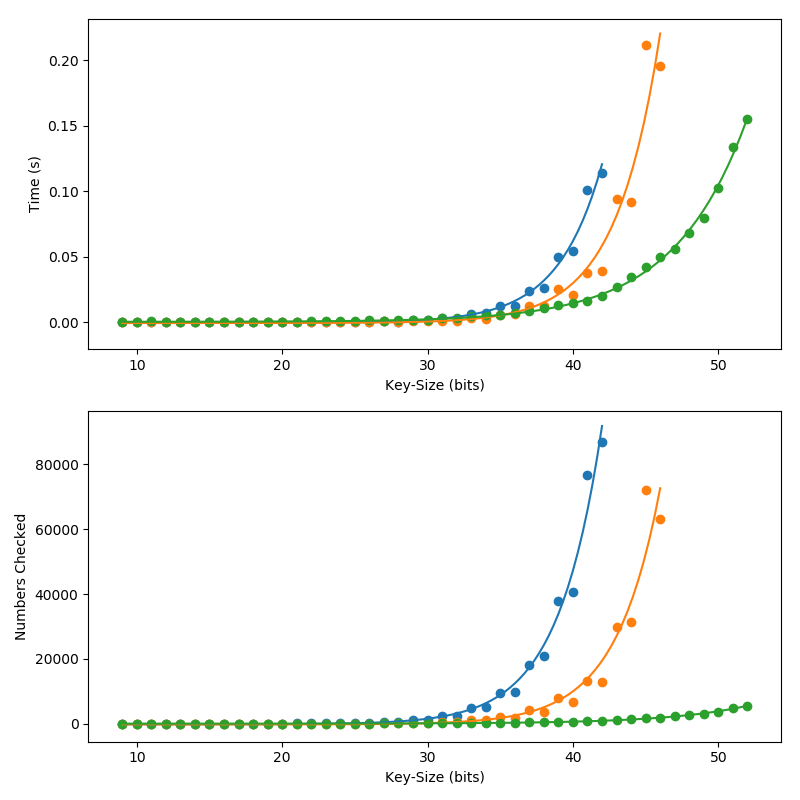

In [ ]:
%matplotlib notebook
from graphs_RSA import *

minBit = 10
bf_bit = 44
ff_bit = 48
rho_bit = 54

testGraphs(minBit, bf_bit, ff_bit, rho_bit)